# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [1]:
import pandas as pd
import zipfile
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import make_scorer, f1_score, classification_report, accuracy_score
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from xgboost import XGBClassifier
from sklearn.svm import SVC

### Load Data

In [305]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [306]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False


In [307]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,mZa9ls,0,23,True
1,mZa9ls,0,24,True
2,mZa9ls,0,25,True
3,mZa9ls,0,26,True
4,mZa9ls,0,27,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [164]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

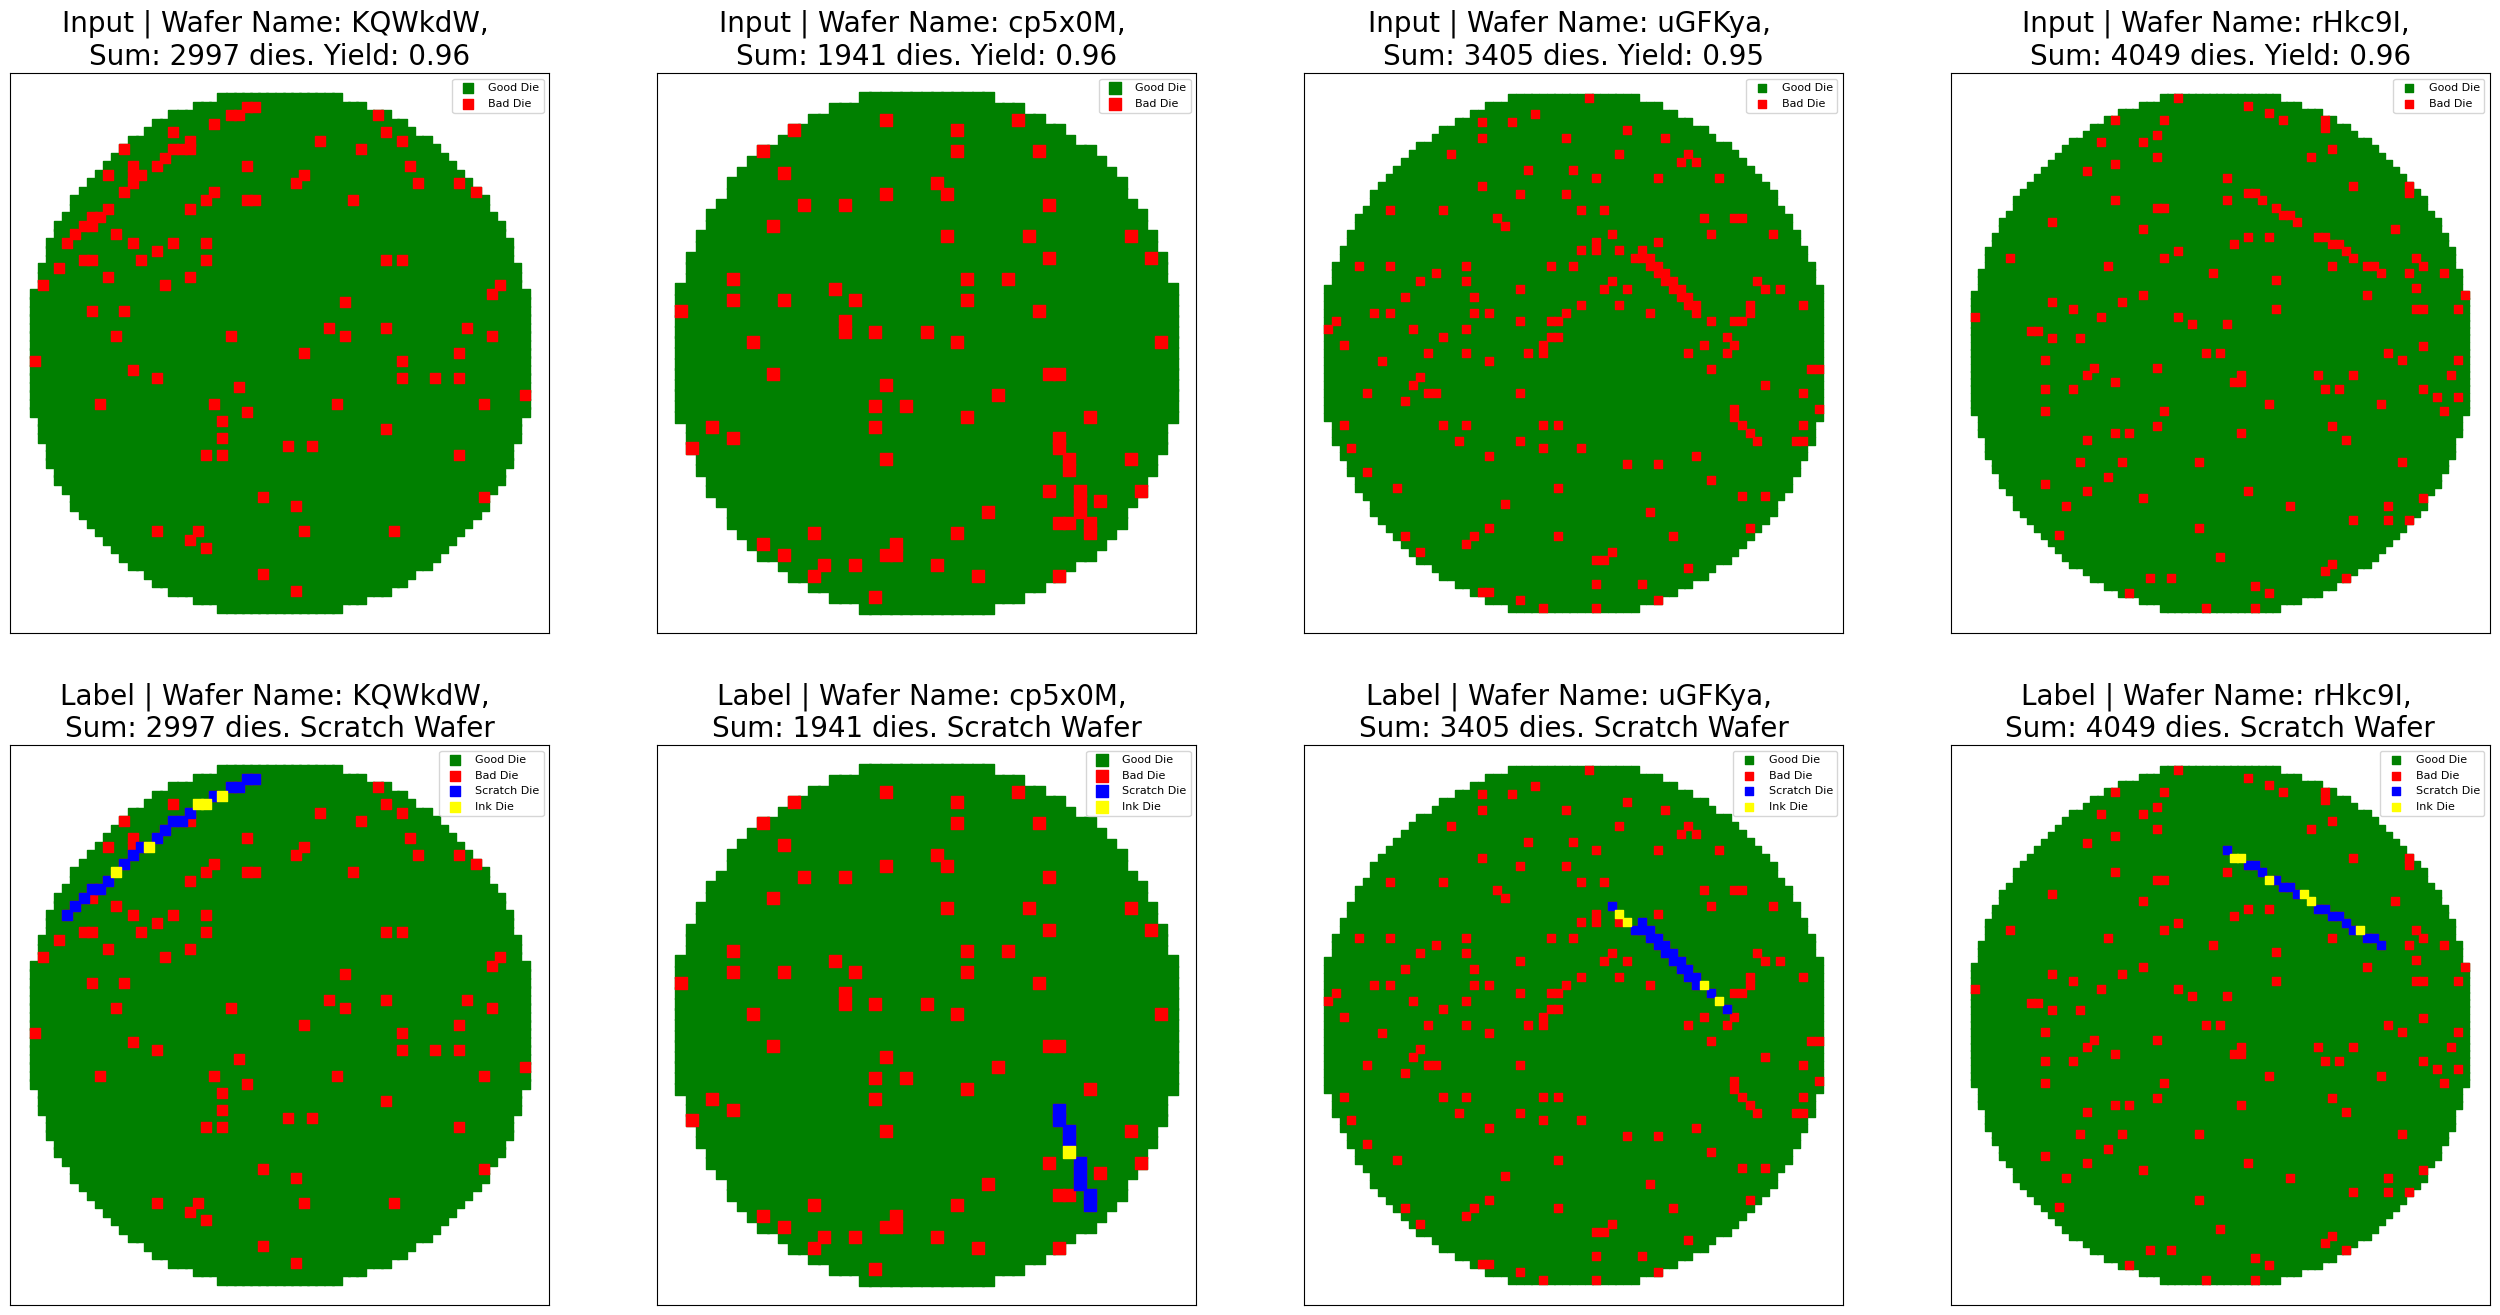

In [165]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

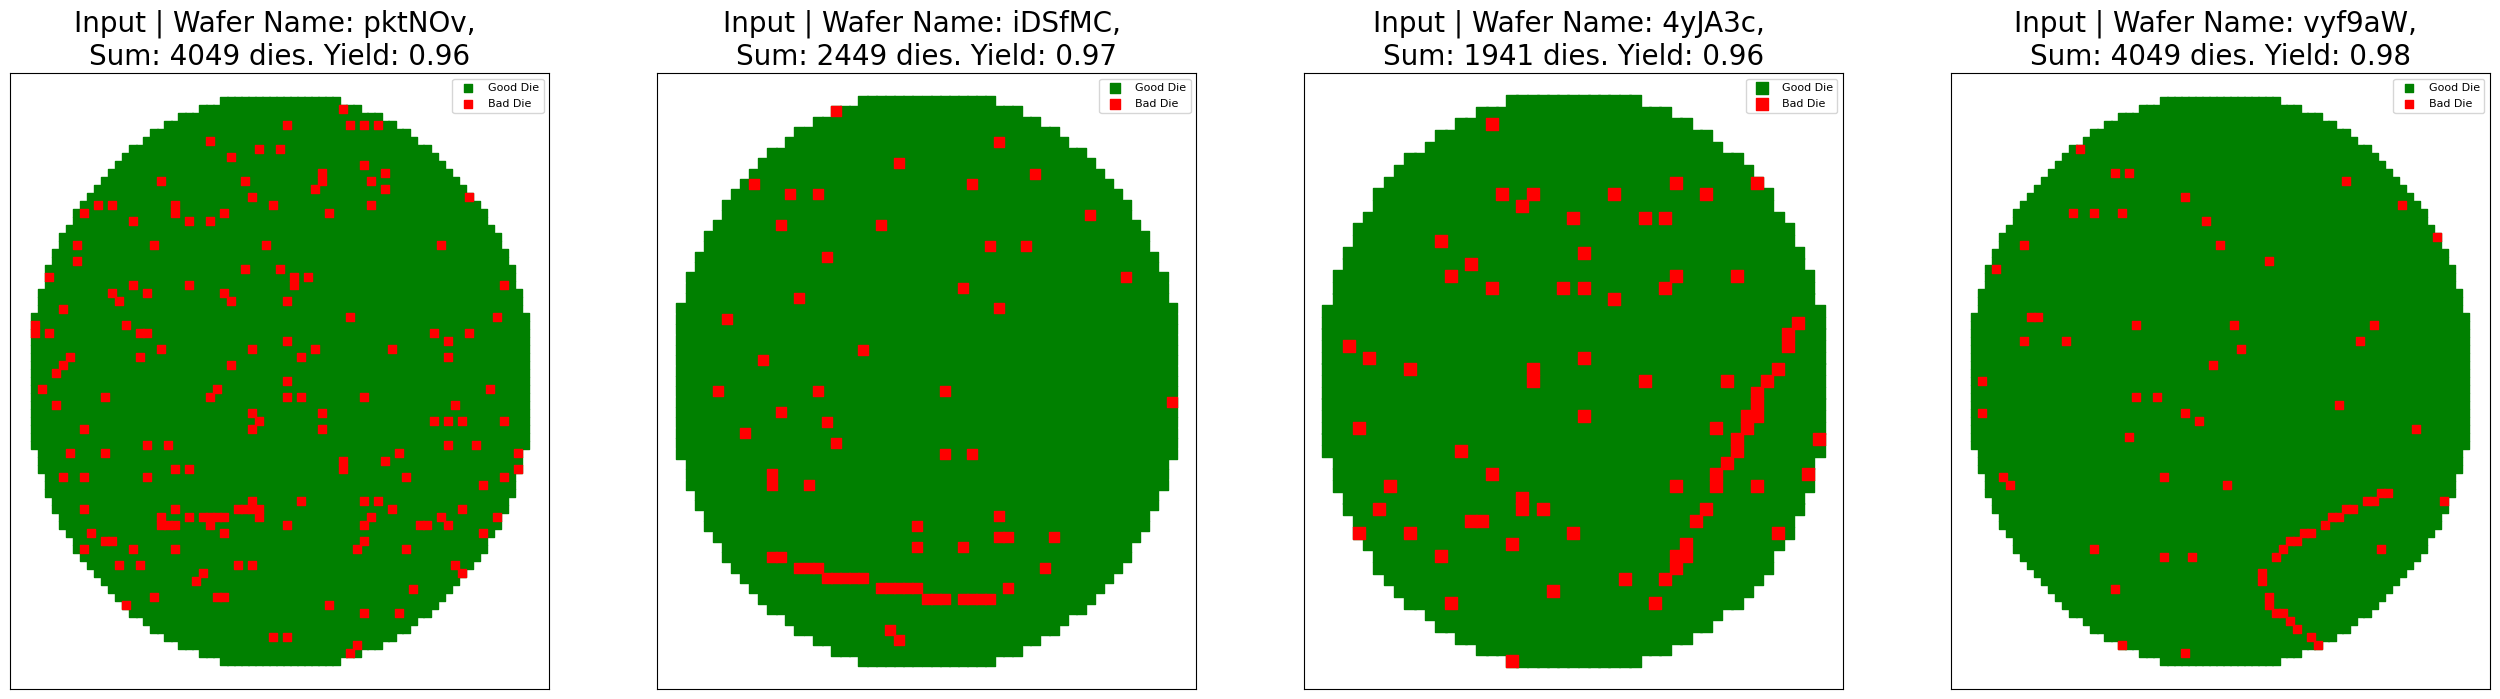

In [166]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

### Solution approach

which machine Learning algorithms should I use?
In general there are two approaches to ML algorithms Classical ML and deep learning, for this spicific problem, the literature review  I made showed various  models that were used:

1. **Classical machine learning algorithms**: KNN, Random Forest (RF), XGBoost, and SVM — these are strong algorithms that do not require heavy computational requirements or resources.

2. **Deep learning algorithms**: CNN, ResNet, etc. — these algorithms are important for detecting spatial patterns. As shown in [this article](https://www.mdpi.com/2079-9292/12/8/1787), deep neural networks generally achieve higher average accuracy compared to classical machine learning algorithms, and wafer defect detection algorithms based on deep learning demonstrate better performance. However, these models require a large amount of data for training.

Thus, I started to explore SVM, with rbf kernel, after some feature engineering and it was really heavy training, so I decided to explore more nonlinear approaches with RF and xgboost and NN for tabular data. The results were not promissing and I went one step further to build wafer maps and use CNN to this purpose. I got much better results in terms of percision and recall (F1 score).

The followings are the steps and the code I wrote to solve this task

## EDA

### Training DataSet

In [167]:
#EDA
df_wafers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415400 entries, 0 to 10415399
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   WaferName     object
 1   DieX          int64 
 2   DieY          int64 
 3   IsGoodDie     bool  
 4   IsScratchDie  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 258.3+ MB


In [168]:
print(df_wafers.isnull().sum()) #Check for null values

WaferName       0
DieX            0
DieY            0
IsGoodDie       0
IsScratchDie    0
dtype: int64


In [169]:
df_wafers_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128335 entries, 0 to 1128334
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   WaferName  1128335 non-null  object
 1   DieX       1128335 non-null  int64 
 2   DieY       1128335 non-null  int64 
 3   IsGoodDie  1128335 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 26.9+ MB


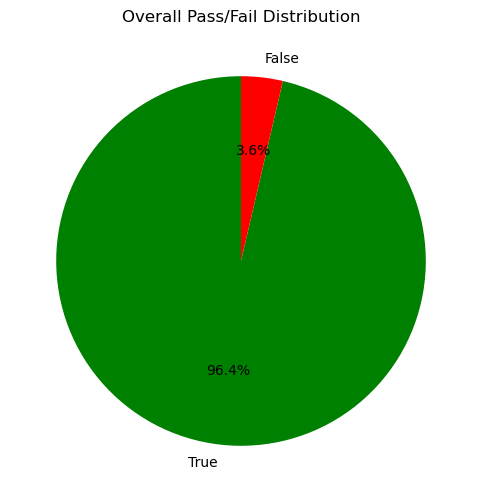

In [170]:
# Count pass and fail
IsGoodDie_counts = df_wafers['IsGoodDie'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(IsGoodDie_counts, labels=IsGoodDie_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Overall Pass/Fail Distribution')
plt.show()


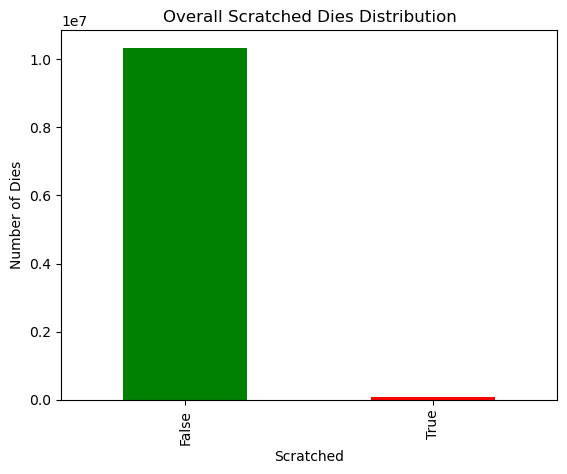

In [ ]:
# Count Scratched dies
IsScratchDie_counts = df_wafers['IsScratchDie'].value_counts()

# Bar chart
IsScratchDie_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Scratched')
plt.ylabel('Number of Dies')
plt.title('Overall Scratched Dies Distribution')
plt.show()


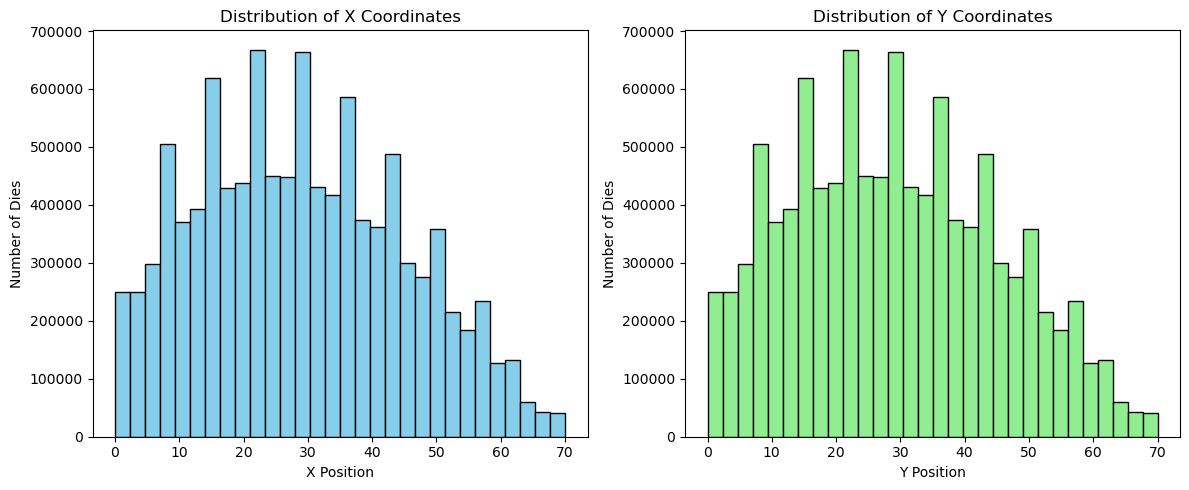

In [172]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(df_wafers['DieX'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of X Coordinates')
axs[0].set_xlabel('X Position')
axs[0].set_ylabel('Number of Dies')

axs[1].hist(df_wafers['DieY'], bins=30, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Y Coordinates')
axs[1].set_xlabel('Y Position')
axs[1].set_ylabel('Number of Dies')

plt.tight_layout()
plt.show()


In [173]:
#Create wafers dataframe from training data
df_wafers_grouped = df_wafers.groupby('WaferName')

#Check wafer dies count
df_wafers_grouped.size()

WaferName
00Q792    1941
01hHtd    1005
042xYr    2449
04XRmn    2997
04kats    4049
          ... 
zr4aii    1005
zuMuaC    3405
zwa9Uv    1005
zxj1fQ    1513
zz8noT    3405
Length: 4200, dtype: int64

In [174]:
# Data per Wafer
summary_data = []

for wafer, wafer_df in df_wafers_grouped:
    WaferName = wafer_df['WaferName']
    wafer_size_x = wafer_df['DieX'].max() - wafer_df['DieX'].min() + 1
    wafer_size_y = wafer_df['DieY'].max() - wafer_df['DieY'].min() + 1
    num_pass = (wafer_df['IsGoodDie'] == 1).sum()
    total_dies = len(wafer_df)
    yield_percentage = (num_pass / total_dies) * 100

    summary_data.append({
        'WaferName': wafer,
        'wafer_size_x': wafer_size_x,
        'wafer_size_y': wafer_size_y,
        'yield': yield_percentage,
        'number_of_dies': total_dies
    })

# Create the new summary dataframe
wafers_data_df = pd.DataFrame(summary_data)

print(wafers_data_df.head())

  WaferName  wafer_size_x  wafer_size_y      yield  number_of_dies
0    00Q792            49            49  96.908810            1941
1    01hHtd            35            35  97.313433            1005
2    042xYr            55            55  96.488363            2449
3    04XRmn            61            61  94.928262            2997
4    04kats            71            71  95.826130            4049


In [175]:
#wafers_data_df.info()
wafers_data_df.describe()

,wafer_size_x,wafer_size_y,yield,number_of_dies
count,4200.000000,4200.000000,4200.000000,4200.000000
mean,54.142857,54.142857,96.285038,2479.857143
std,11.753950,11.753950,1.100793,999.180721
min,35.000000,35.000000,90.019828,1005.000000
25%,43.000000,43.000000,95.508371,1513.000000
50%,55.000000,55.000000,96.296296,2449.000000
75%,65.000000,65.000000,97.116637,3405.000000
max,71.000000,71.000000,98.905473,4049.000000


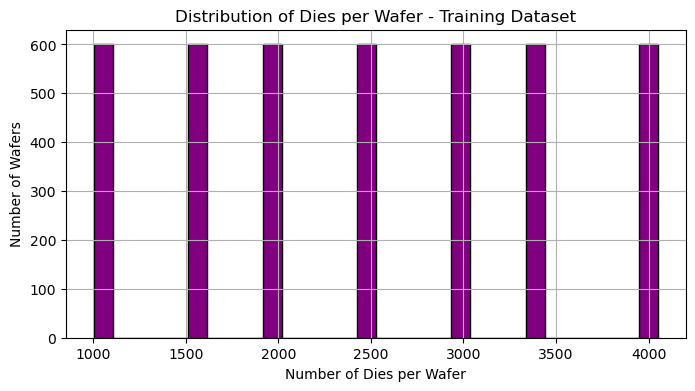

In [176]:
plt.figure(figsize=(8, 4))
plt.hist(wafers_data_df['number_of_dies'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Dies per Wafer - Training Dataset')
plt.xlabel('Number of Dies per Wafer')  
plt.ylabel('Number of Wafers')
plt.grid(True)
plt.show()


In [177]:
# Data per Wafer in testing dataset
summary_data = []

for wafer, wafer_df in df_wafers_test.groupby('WaferName'):
    WaferName = wafer_df['WaferName']
    wafer_size_x = wafer_df['DieX'].max() - wafer_df['DieX'].min() + 1
    wafer_size_y = wafer_df['DieY'].max() - wafer_df['DieY'].min() + 1
    num_pass = (wafer_df['IsGoodDie'] == 1).sum()
    total_dies = len(wafer_df)
    yield_percentage = (num_pass / total_dies) * 100

    summary_data.append({
        'WaferName': wafer,
        'wafer_size_x': wafer_size_x,
        'wafer_size_y': wafer_size_y,
        'yield': yield_percentage,
        'number_of_dies': total_dies
    })

# Create the new summary dataframe
wafers_testing_data_df = pd.DataFrame(summary_data)

wafers_testing_data_df.describe()

,wafer_size_x,wafer_size_y,yield,number_of_dies
count,455.000000,455.000000,455.000000,455.000000
mean,54.142857,54.142857,91.974123,2479.857143
std,11.765487,11.765487,12.299352,1000.161447
min,35.000000,35.000000,28.705594,1005.000000
25%,43.000000,43.000000,93.925527,1513.000000
50%,55.000000,55.000000,95.998367,2449.000000
75%,65.000000,65.000000,97.166409,3405.000000
max,71.000000,71.000000,99.065732,4049.000000


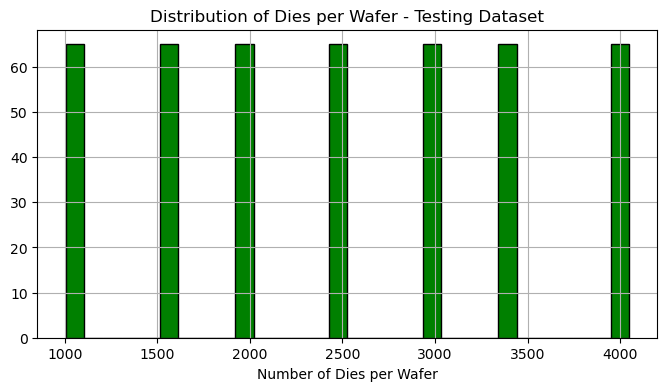

In [178]:
plt.figure(figsize=(8, 4))
plt.hist(wafers_testing_data_df['number_of_dies'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Dies per Wafer - Testing Dataset')
plt.xlabel('Number of Dies per Wafer')  
plt.grid(True)
plt.show()


In [179]:
print(sorted(wafers_testing_data_df['number_of_dies'].unique()))
print(sorted(wafers_data_df['number_of_dies'].unique()))


[1005, 1513, 1941, 2449, 2997, 3405, 4049]
[1005, 1513, 1941, 2449, 2997, 3405, 4049]


Main Points from training test DFs - EDA:
1. X and Y coordinates are not distributed uniformly, after normalization fewer dies at the edges (-0.5 and 0.5) is expected and realistic for wafer layouts.
2. The labels are not balanced, I can use label balance or label partial balance technics. Yet it might be harmful to the model and prevent it from catching the patterns, thus I would rather start without balancing and if needed I can create subsets with different balanced ratios.
=> after trying LinearSVC, xGBOost and RF, and didn't got good results, I understood that the data is extremly imbalanced (and using parameters inside the model to bridge the gap was not enough). This imballance makes the models still have high accuracy because it predects everything as not scratched, but perscision and recall for label 1 was really low.
=> I need to balance the data. I have two options: use sennthasized data or try upsampling or downsampling. the data is huge I can start with downsampling dies with 0 label.
3. No null values in the training and test datasets.
4. wafers are distributed equally between wafer size (every category (7) of wafers' size has 600 wafers)
wafers size are as follows: [1005, 1513, 1941, 2449, 2997, 3405, 4049]
5. Minimum Yield of training dataset is 90, it depends on the company yield specification, but typiclly it is considered a high yield. And it makes sense, since the Ink Process was performed for these wafers.
6. Yields of some wafers in the testing dataset are lower than 90 (minimum yield is 28.71%), thus I might need to exclude these wafers from the testing data as they will not go through the inking process.

### Data Transformation and Feature Engineering

1. I mapped True and False to 1 and 0.
2. Handling missing values: in this case testing and training data do not have nulls. (otherwize I would use KNN to complete the missing data or to fill it as failed (in case this is the company preferable))
3. Normalization is needed for DieX and DieY features as the EDA showed unequal wafer sizes and a spikes in the coordination histograms.
4. Feature Engineering: I used normalization, yiels, number of dies, X and Y coordinates squered, multeplied and die distance from the wafer center. 
5. Train-Validation Split: I need to make sure to avoid data leakage, I need to make sure each wafer is either used for training or testing

In [180]:
#wafers_data_df wafer_size_x  wafer_size_y      yield  number_of_dies
wafer_features_df = df_wafers.copy()
# Merge wafer size into features dataframe based on WaferName
wafer_features_df = wafer_features_df.merge(wafers_data_df[['WaferName', 'wafer_size_x', 'wafer_size_y', 'yield', 'number_of_dies']], on='WaferName', how='left')

#normalize DieX and DieY and center around zero
wafer_features_df['DieX_norm'] = wafer_features_df['DieX'] / wafer_features_df['wafer_size_x'] - 0.5
wafer_features_df['DieY_norm'] = wafer_features_df['DieY'] / wafer_features_df['wafer_size_y'] - 0.5

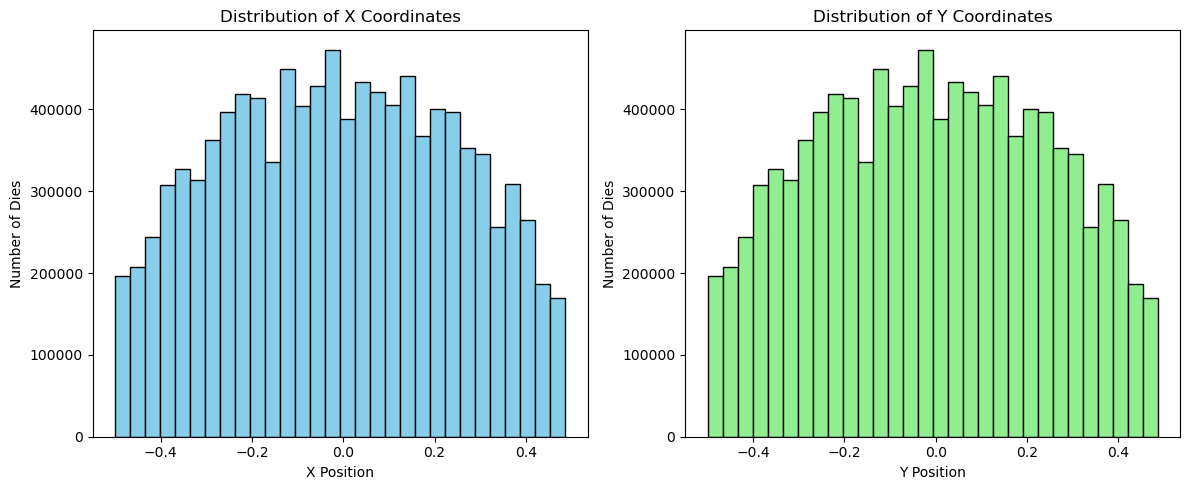

In [181]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(wafer_features_df['DieX_norm'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of X Coordinates')
axs[0].set_xlabel('X Position')
axs[0].set_ylabel('Number of Dies')

axs[1].hist(wafer_features_df['DieY_norm'], bins=30, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Y Coordinates')
axs[1].set_xlabel('Y Position')
axs[1].set_ylabel('Number of Dies')

plt.tight_layout()
plt.show()

In [182]:
#SVM Models prefare numeric features:
# Polynomial features
wafer_features_df['DieX_sq'] = wafer_features_df['DieX_norm'] ** 2
wafer_features_df['DieY_sq'] = wafer_features_df['DieY_norm'] ** 2
wafer_features_df['DieX_DieY'] = wafer_features_df['DieX_norm'] * wafer_features_df['DieY_norm']

# distance from center
wafer_features_df['Dist_from_center'] = np.sqrt(wafer_features_df['DieX_norm']**2 + wafer_features_df['DieY_norm']**2)

#transform True and False values to numerical values [0,1]
wafer_features_df['IsGoodDie'] = wafer_features_df['IsGoodDie'].astype(int)
wafer_features_df['IsScratchDie'] = wafer_features_df['IsScratchDie'].astype(int)

#normalize the number of dies
wafer_features_df['number_of_dies_norm'] = (wafer_features_df['number_of_dies'] - min(wafer_features_df['number_of_dies'])) / (max(wafer_features_df['number_of_dies']) - min(wafer_features_df['number_of_dies'])) 
print(wafer_features_df.head())
print('Training dies:', wafer_features_df.shape)

  WaferName  DieX  DieY  IsGoodDie  IsScratchDie  wafer_size_x  wafer_size_y  \
0    8PFrAN     0    27          1             0            71            71   
1    8PFrAN     0    28          1             0            71            71   
2    8PFrAN     0    29          1             0            71            71   
3    8PFrAN     0    30          1             0            71            71   
4    8PFrAN     0    31          1             0            71            71   

       yield  number_of_dies  DieX_norm  DieY_norm  DieX_sq   DieY_sq  \
0  95.381576            4049       -0.5  -0.119718     0.25  0.014332   
1  95.381576            4049       -0.5  -0.105634     0.25  0.011159   
2  95.381576            4049       -0.5  -0.091549     0.25  0.008381   
3  95.381576            4049       -0.5  -0.077465     0.25  0.006001   
4  95.381576            4049       -0.5  -0.063380     0.25  0.004017   

   DieX_DieY  Dist_from_center  number_of_dies_norm  
0   0.059859          0.51

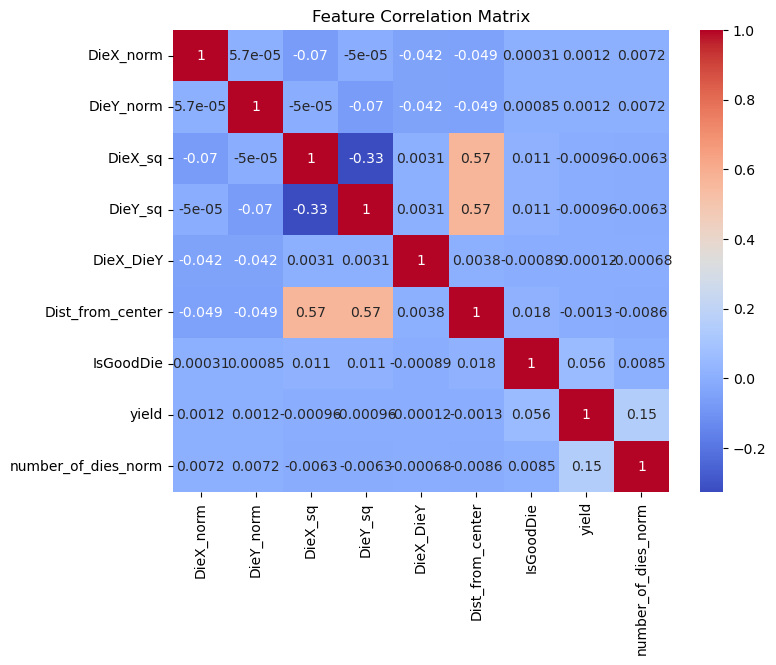

In [183]:
# Correlation matrix
corr = wafer_features_df[['DieX_norm', 'DieY_norm', 'DieX_sq', 'DieY_sq', 'DieX_DieY', 'Dist_from_center', 'IsGoodDie', 'yield', 'number_of_dies_norm']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


### Split the data and keep each wafer in different dataset

In [184]:
train_dies = []
test_dies = []

# loop over each wafer size category
for size_category, group_df in wafer_features_df.groupby('number_of_dies_norm'):
    wafer_names = group_df['WaferName'].unique()
    
    # Split wafer names
    wafer_train, wafer_test = train_test_split(
        wafer_names, test_size=0.1, random_state=42)
    
    # Select dies belonging to those wafers to avoid data leakage
    train_dies.append(group_df[group_df['WaferName'].isin(wafer_train)])
    test_dies.append(group_df[group_df['WaferName'].isin(wafer_test)])

# Concatenate all size categories together
train_df = pd.concat(train_dies).reset_index(drop=True)
test_df = pd.concat(test_dies).reset_index(drop=True)

# Shuffle the dies
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

print('Training dies:', train_df.shape)
print('Testing dies:', test_df.shape)


Training dies: (9373860, 16)
Testing dies: (1041540, 16)


## Process
1. I tried to train an SVC model with rbf kernel, this is the model that most papers used. First the huge amount of data took endless time, the model needed to compute a huge kernel matrix. Thus I decided to use undersampling balaned data but with engineered features of the x,y coordinations.
The results wasn't promissing: the percision of class 1 is low, and the recall is okay but not at its best. 

2. I decided to try SMOTEENN to balance the data for MPL classifier. This NN classifier can deal with big amount of data. And undersampled data for xGBoost and RF. These models were refered by many articles on wafer defect detections, and they are doing well for data that is unseperable lineary. I used the undersampled data for computational limitations.
Yet, the results were super close to each other and the perision(0.18) and recall(0.84) didn't improved. 

3. As some papers discussed semantic segmentation for wafer scratch detection, I also tried to implement this approach. 
I used Encoder Decoder archtecture with data augmentation. And I improved the results of both percision and recall.

In [185]:
# split labels use original features

X_train_original = train_df[['DieX_norm', 'DieY_norm', 'IsGoodDie', 'yield', 'number_of_dies_norm']]
X_test_origial =  test_df[['DieX_norm', 'DieY_norm', 'IsGoodDie', 'yield', 'number_of_dies_norm']]

y_train_original = train_df['IsScratchDie'] 
y_test_original = test_df['IsScratchDie']


### Add engineered features

In [186]:
# split labels, these are relevant to SVM

X_train = train_df[['DieX_norm', 'DieY_norm', 'DieX_sq', 'DieY_sq', 'DieX_DieY', 'Dist_from_center', 'IsGoodDie', 'yield', 'number_of_dies_norm']]
X_test =  test_df[['DieX_norm', 'DieY_norm', 'DieX_sq', 'DieY_sq', 'DieX_DieY', 'Dist_from_center', 'IsGoodDie', 'yield', 'number_of_dies_norm']]

y_train = train_df['IsScratchDie'] 
y_test = test_df['IsScratchDie']

### Use SMOTEENN to balance the data

In [187]:
# use data without feature engineering: called original

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_original, y_train_original)


In [189]:
print(np.shape(X_resampled))
print(np.shape(y_resampled))

(18237973, 5)
(18237973,)


### Use MLPC on synthasized data

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

mlp = MLPClassifier(max_iter=300, random_state=42)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, pos_label=1),
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_resampled, y_resampled)
print("Best Parameters:", grid_search.best_params_)


best_mlp = grid_search.best_estimator_
y_pred_GS = best_mlp.predict(X_test_origial)

from sklearn.metrics import classification_report
print(classification_report(y_test_original, y_pred_GS))


### MLPC Best Model - ScreenShot
<img src="MLPC - best model.png" alt="Erosion and dilation output on a inking pattern" width="1000" height="180"/>

Accuracy: 0.9688902970601225
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1033471
           1       0.18      0.84      0.30      8069

    accuracy                           0.97   1041540
   macro avg       0.59      0.91      0.64   1041540
weighted avg       0.99      0.97      0.98   1041540



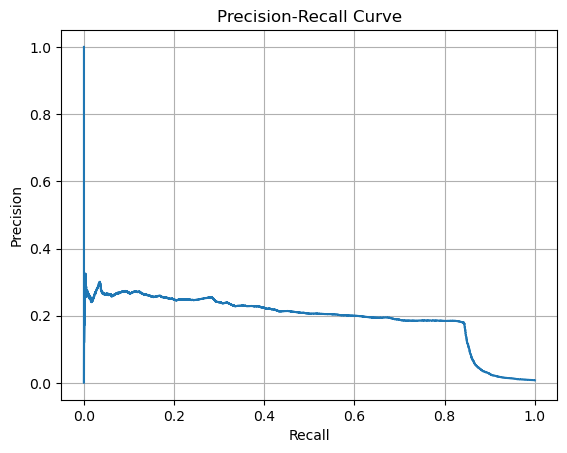

In [158]:
#best model params: 'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'sgd'

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, learning_rate_init=0.001, solver='sgd', random_state=42, alpha=0.001, activation='relu')

mlp.fit(X_resampled, y_resampled)
y_pred_bestmodel = mlp.predict(X_test_origial)

# Evaluate
print(classification_report(y_test_original, y_pred_bestmodel))

# Get predicted probabilities for class 1
y_scores_bestmodel = mlp.predict_proba(X_test_origial)[:, 1]

# Compute precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_original, y_scores_bestmodel)

# Plot
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

## Resampling

In [192]:

# Oversampling using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train_original, y_train_original)
print("Oversampled class distribution:", Counter(y_over))


# Undersampling using RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train_original, y_train_original)
print("Undersampled class distribution:", Counter(y_under))

Oversampled class distribution: Counter({0: 9301610, 1: 9301610})
Undersampled class distribution: Counter({0: 72250, 1: 72250})


### Try RF on data without feature engineering and with undersampling - the model training time with the upsampling took endlesstime

In [ ]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='f1', 
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit on the resampled training data
grid_search.fit(X_under, y_under)

# Best model
best_rf = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Evaluate on the original test set
y_pred_rf_gs = best_rf.predict(X_test_origial)
accuracy = accuracy_score(y_test_original, y_pred_rf_gs)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test_original, y_pred_rf_gs))

### RF best model ScreenShot
<img src="RF - best model.png" alt="Erosion and dilation output on a inking pattern" width="900" height="180"/>

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1033471
           1       0.18      0.84      0.30      8069

    accuracy                           0.97   1041540
   macro avg       0.59      0.91      0.64   1041540
weighted avg       0.99      0.97      0.98   1041540



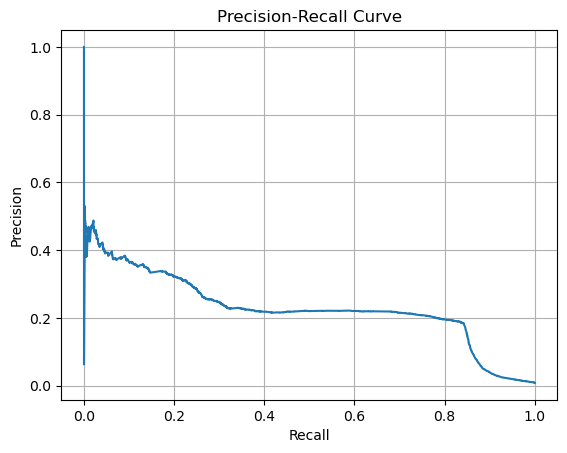

In [195]:
rf_bm= RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42)

rf_bm.fit(X_under, y_under)
y_pred_bestmodel = rf_bm.predict(X_test_origial)

# Evaluate
print(classification_report(y_test_original, y_pred_bestmodel))

# Get predicted probabilities for class 1
y_scores_bestmodel = rf_bm.predict_proba(X_test_origial)[:, 1]

# Compute precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_original, y_scores_bestmodel)

# Plot
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

## Try XGBoost same data as RF

In [ ]:

# Define the base model
xg_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xg_model,
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1,  # Use all processors
                           verbose=1)

# Fit the model
grid_search.fit(X_under, y_under)

# Best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred_xg_gs = best_model.predict(X_test_origial)

# Evaluation
accuracy = accuracy_score(y_test_original, y_pred_xg_gs)
print(f"Best Accuracy: {accuracy:.4f}")
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test_original, y_pred_xg_gs))


### xgBoost best model
<img src="xGBoost - best model.png" alt="Erosion and dilation output on a inking pattern" width="900" height="180"/>

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1033471
           1       0.18      0.84      0.30      8069

    accuracy                           0.97   1041540
   macro avg       0.59      0.91      0.64   1041540
weighted avg       0.99      0.97      0.98   1041540



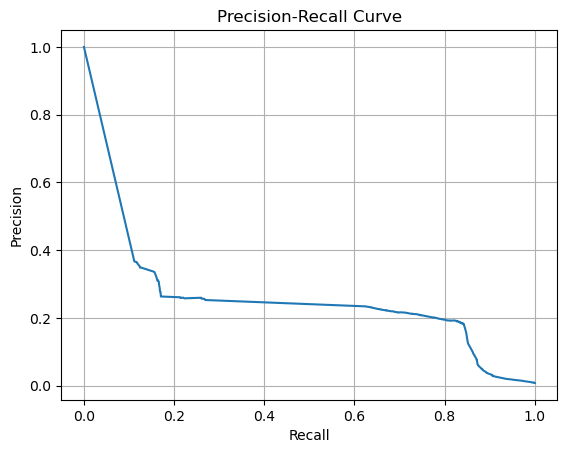

In [197]:
xg_bm= XGBClassifier(eval_metric='logloss', learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, max_depth=3, random_state=42)

xg_bm.fit(X_under, y_under)
y_pred_bestmodel = xg_bm.predict(X_test_origial)

# Evaluate
print(classification_report(y_test_original, y_pred_bestmodel))

# Get predicted probabilities for class 1
y_scores_bestmodel = xg_bm.predict_proba(X_test_origial)[:, 1]

# Compute precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_original, y_scores_bestmodel)

# Plot
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

## Try Simple SVC

In [200]:
# Undersampling for x with engineered features
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_feat, y_under_feat = undersample.fit_resample(X_train, y_train)
print("Undersampled class distribution:", Counter(y_under_feat))

Undersampled class distribution: Counter({0: 72250, 1: 72250})


In [202]:

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearch with SVC
grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit on training data
grid.fit(X_under_feat, y_under_feat)

# Best estimator
best_svm = grid.best_estimator_
print(f"Best parameters: {grid.best_params_}")

# Predict on test set
y_pred_svc_gs = best_svm.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc_gs)}")
print(classification_report(y_test, y_pred_svc_gs))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 1.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.9min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 1.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.0min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 2.0min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 2.0min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 2.3min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.5min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 3.1min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 1.6min
[CV] END ....................C=0.1, gamma=scale,

/opt/anaconda3/envs/AICourseEnv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 2.6min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 1.1min
[CV] END ......................C=1, gamma=scale, kernel=poly; total time= 2.1min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 1.8min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time= 1.6min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 7.1min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 7.1min
[CV] END ...................C=10, gamma=scale, kernel=linear; total time= 1.7min
[CV] END ...................C=10, gamma=scale, kernel=linear; total time= 1.8min
[CV] END ...................C=10, gamma=scale, kernel=linear; total time= 1.8min
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time= 2.0min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 3.5min
[CV] END ...................

### SVM best model ScreenShot
<img src="SVM - best model.png" alt="Erosion and dilation output on a inking pattern" width="700" height="180"/>

In [205]:
SVC_bm= SVC(C=1, kernel='poly' ,gamma='auto', random_state=42)

SVC_bm.fit(X_under_feat, y_under_feat)
y_pred_bestmodel = SVC_bm.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_bestmodel))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1033471
           1       0.18      0.84      0.29      8069

    accuracy                           0.97   1041540
   macro avg       0.59      0.91      0.64   1041540
weighted avg       0.99      0.97      0.98   1041540



### Second Approach - Wafer Maps for Convolution Nuelral Network

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import os
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve

In [375]:
def prepare_training_wafer_images(train_df, fixed_size=128):
    """
    Prepares wafer images and masks for the training dataset.

    Args:
        train_df (DataFrame): Training dataframe, must include 'IsScratchDie'.
        fixed_size (int): Size to which wafer images will be padded (default=128).

    Returns:
        train_images (list), train_masks (list)
    """
    wafer_images = []
    wafer_masks = []

    for wafer_name, wafer_data in train_df.groupby('WaferName'):
        min_x, max_x = wafer_data['DieX'].min(), wafer_data['DieX'].max()
        min_y, max_y = wafer_data['DieY'].min(), wafer_data['DieY'].max()
        
        width = max_x - min_x + 1
        height = max_y - min_y + 1

        image = np.ones((height, width), dtype=np.uint8) * 127  # BACKGROUND_VALUE
        mask = np.zeros((height, width), dtype=np.uint8)

        for _, row in wafer_data.iterrows():
            x = row['DieX'] - min_x
            y = row['DieY'] - min_y
            color = 255 if row['IsGoodDie'] else 0
            image[y, x] = color

            mask[y, x] = 1 if row['IsScratchDie'] else 0

        padded_image = np.ones((fixed_size, fixed_size), dtype=np.uint8) * 127
        padded_mask = np.zeros((fixed_size, fixed_size), dtype=np.uint8)

        y_offset = (fixed_size - height) // 2
        x_offset = (fixed_size - width) // 2

        padded_image[y_offset:y_offset+height, x_offset:x_offset+width] = image
        padded_mask[y_offset:y_offset+height, x_offset:x_offset+width] = mask

        wafer_images.append(padded_image)
        wafer_masks.append(padded_mask)

    return wafer_images, wafer_masks


In [376]:
wafer_images, wafer_masks = prepare_training_wafer_images(df_wafers)

In [377]:
def prepare_test_wafer_images(test_df, fixed_size=128):
    """
    Prepares wafer images for the test dataset (no scratch labels).

    Args:
        test_df (DataFrame): Test dataframe, does not need 'IsScratchDie'.
        fixed_size (int): Size to which wafer images will be padded (default=128).

    Returns:
        test_images (list)
    """
    wafer_images_test = []

    for wafer_name, wafer_data in test_df.groupby('WaferName'):
        min_x, max_x = wafer_data['DieX'].min(), wafer_data['DieX'].max()
        min_y, max_y = wafer_data['DieY'].min(), wafer_data['DieY'].max()
        
        width = max_x - min_x + 1
        height = max_y - min_y + 1

        image = np.ones((height, width), dtype=np.uint8) * 127

        for _, row in wafer_data.iterrows():
            x = row['DieX'] - min_x
            y = row['DieY'] - min_y
            color = 255 if row['IsGoodDie'] else 0
            image[y, x] = color

        padded_image = np.ones((fixed_size, fixed_size), dtype=np.uint8) * 127

        y_offset = (fixed_size - height) // 2
        x_offset = (fixed_size - width) // 2

        padded_image[y_offset:y_offset+height, x_offset:x_offset+width] = image

        wafer_images_test.append(padded_image)

    return wafer_images_test


In [378]:
test_images = prepare_test_wafer_images(df_wafers_test)

In [379]:
def visualize_wafers(images, masks=None, num_samples=5):
    """
    Visualizes wafer images (and optionally their masks).
    
    Args:
        images (list or array): List/array of wafer images (numpy arrays).
        masks (list or array, optional): List/array of masks (numpy arrays). Default is None.
        num_samples (int): Number of samples to visualize.
    """
    num_samples = min(num_samples, len(images))  
    
    plt.figure(figsize=(10, 4 * num_samples))
    
    for i in range(num_samples):
        # Plot the image
        plt.subplot(num_samples, 2, 2*i + 1)
        plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
        plt.title(f'Wafer Image {i}')
        plt.axis('off')
        
        # Plot the corresponding mask (if provided)
        if masks is not None:
            plt.subplot(num_samples, 2, 2*i + 2)
            plt.imshow(masks[i], cmap='gray', vmin=0, vmax=1)
            plt.title(f'Wafer Mask {i}')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

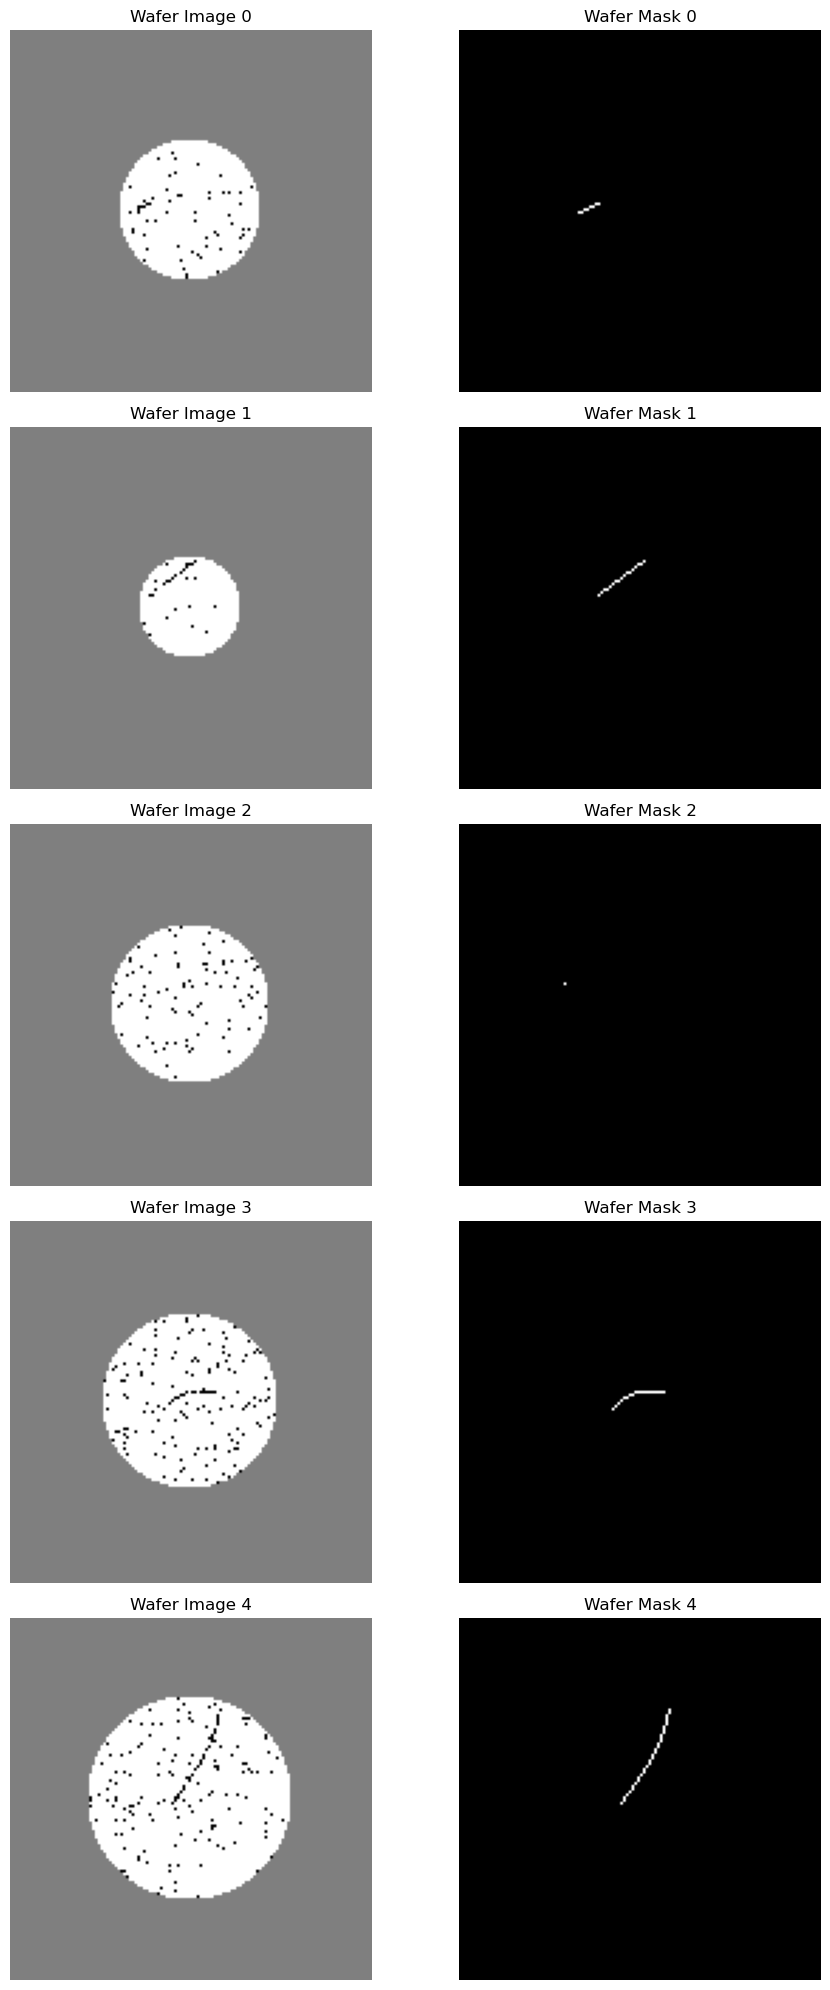

In [380]:
visualize_wafers(wafer_images, wafer_masks, num_samples=5)

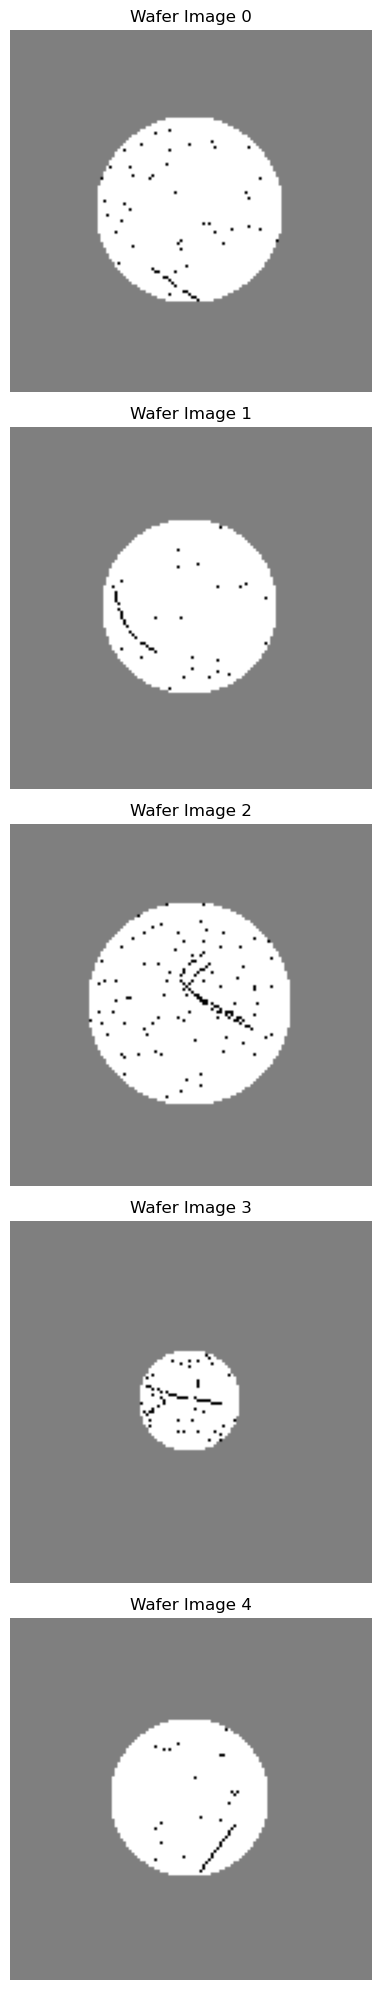

In [381]:
visualize_wafers(test_images, num_samples=5)

In [382]:

# Define transformations for data augmentation: Horizonal Flip, Vertical Flip and Rotation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
])


In [383]:
#dataset class

class WaferDataset(Dataset):
    def __init__(self, images, masks, transform=None):
        self.images = images
        self.masks = masks
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        mask = self.masks[idx]
        
        # Expand dims to [C, H, W]
        image = np.expand_dims(image, axis=0) / 255.0
        mask = np.expand_dims(mask, axis=0)
        
        image = torch.tensor(image, dtype=torch.float32)
        mask = torch.tensor(mask, dtype=torch.float32)

        if self.transform:
            # Apply same transform to both image and mask
            stacked = torch.cat([image, mask], dim=0)  # shape [2, H, W]
            stacked = self.transform(stacked)
            image = stacked[0].unsqueeze(0)  # back to [1, H, W]
            mask = stacked[1].unsqueeze(0)

        return image, mask


In [384]:
class WaferTestDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        image = np.expand_dims(image, axis=0) / 255.0
        image = torch.tensor(image, dtype=torch.float32)
        
        if self.transform:
            image = self.transform(image)
        
        return image


In [385]:
#data loader for train val dataset
train_imgs, val_imgs, train_labels, val_labels = train_test_split(wafer_images, wafer_masks, test_size=0.2, random_state=42)

train_dataset = WaferDataset(train_imgs, train_labels, transform=train_transform)
val_dataset = WaferDataset(val_imgs, val_labels, transform=None)  # no augmentation for val set


train_loader_bs_32 = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader_bs_32 = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [386]:
#test dataloader
test_dataset = WaferTestDataset(test_images, transform=None)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [335]:
class SmallWaferCNN(nn.Module):
    def __init__(self):
        super(SmallWaferCNN, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # [1,128,128] -> [16,128,128]
            nn.ReLU(),
            nn.MaxPool2d(2),                             # [16,64,64]
            
            nn.Conv2d(16, 32, kernel_size=3, padding=1), # [16,64,64] -> [32,64,64]
            nn.ReLU(),
            nn.MaxPool2d(2),                             # [32,32,32]
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # [32,32,32] -> [64,32,32]
            nn.ReLU(),
            nn.MaxPool2d(2),                             # [64,16,16]
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2), # [32,32,32]
            nn.ReLU(),
            
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2), # [16,64,64]
            nn.ReLU(),
            
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),  # [1,128,128]
            nn.Sigmoid()  # output between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


### Small CNN
I tried encoder decoder CNN, without batch norm, and without data augmentation, the results were close to those I got from the previous models. (Precision: 0.3525 Recall: 0.8626)

I decided to use data augmentation (random rotation, horizontal and vertical flip for each trained image) in order to optimize the model, yet the results were not promising. In order to optimize the results I tried to use deeper CNN, includes also batchNorm for a faster and stable training. The deeper nural network improved the results significantly, and this is the model I will choose. 

In [387]:
class DeeperWaferCNN(nn.Module):
    def __init__(self):
        super(DeeperWaferCNN, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(16, 1, kernel_size=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [388]:
# Initialize model
#model = SmallWaferCNN()

model = DeeperWaferCNN()

# Move to GPU 
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('mps' if torch.backends.mps.is_available() else "cpu" )
model = model.to(device)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [392]:
def train(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=50):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    train_f1s, val_f1s = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0
        running_preds = []
        running_targets = []

        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            preds = (outputs > 0.5).float()
            running_preds.append(preds.cpu())
            running_targets.append(masks.cpu())

        # End of epoch
        train_losses.append(running_loss / len(train_loader))

        # Compute Accuracy and F1 for train
        preds_flat = torch.cat(running_preds).view(-1)
        targets_flat = torch.cat(running_targets).view(-1)
        train_acc = accuracy_score(targets_flat.numpy(), preds_flat.numpy())
        train_f1 = f1_score(targets_flat.numpy(), preds_flat.numpy())

        train_accuracies.append(train_acc)
        train_f1s.append(train_f1)

        # ---- Validation ----
        model.eval()
        val_loss = 0
        val_preds = []
        val_targets = []

        with torch.no_grad():
            for images, masks in val_loader:
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)
                loss = criterion(outputs, masks)
                val_loss += loss.item()

                preds = (outputs > 0.5).float()
                val_preds.append(preds.cpu())
                val_targets.append(masks.cpu())

        val_losses.append(val_loss / len(val_loader))

        preds_flat = torch.cat(val_preds).view(-1)
        targets_flat = torch.cat(val_targets).view(-1)
        val_acc = accuracy_score(targets_flat.numpy(), preds_flat.numpy())
        val_f1 = f1_score(targets_flat.numpy(), preds_flat.numpy())

        val_accuracies.append(val_acc)
        val_f1s.append(val_f1)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss {train_losses[-1]:.4f}, Val Loss {val_losses[-1]:.4f}, Train Acc {train_acc:.4f}, Val Acc {val_acc:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies, train_f1s, val_f1s


In [393]:
train_losses, val_losses, train_accuracies, val_accuracies, train_f1s, val_f1s = train(
    model, train_loader_bs_32, val_loader_bs_32, criterion, optimizer, device, num_epochs=50)

Epoch 1/50: Train Loss 0.0042, Val Loss 0.0032, Train Acc 0.9988, Val Acc 0.9989
Epoch 2/50: Train Loss 0.0034, Val Loss 0.0029, Train Acc 0.9988, Val Acc 0.9989
Epoch 3/50: Train Loss 0.0031, Val Loss 0.0031, Train Acc 0.9988, Val Acc 0.9989
Epoch 4/50: Train Loss 0.0029, Val Loss 0.0027, Train Acc 0.9988, Val Acc 0.9989
Epoch 5/50: Train Loss 0.0028, Val Loss 0.0025, Train Acc 0.9988, Val Acc 0.9989
Epoch 6/50: Train Loss 0.0027, Val Loss 0.0024, Train Acc 0.9988, Val Acc 0.9989
Epoch 7/50: Train Loss 0.0026, Val Loss 0.0024, Train Acc 0.9988, Val Acc 0.9989
Epoch 8/50: Train Loss 0.0025, Val Loss 0.0023, Train Acc 0.9988, Val Acc 0.9989
Epoch 9/50: Train Loss 0.0025, Val Loss 0.0021, Train Acc 0.9989, Val Acc 0.9990
Epoch 10/50: Train Loss 0.0024, Val Loss 0.0020, Train Acc 0.9989, Val Acc 0.9990
Epoch 11/50: Train Loss 0.0023, Val Loss 0.0020, Train Acc 0.9990, Val Acc 0.9991
Epoch 12/50: Train Loss 0.0022, Val Loss 0.0018, Train Acc 0.9990, Val Acc 0.9992
Epoch 13/50: Train Loss 0

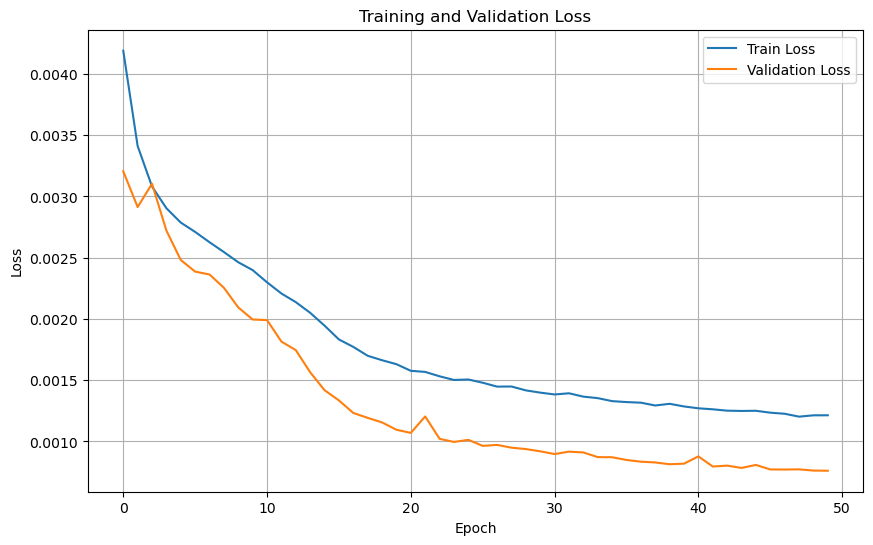

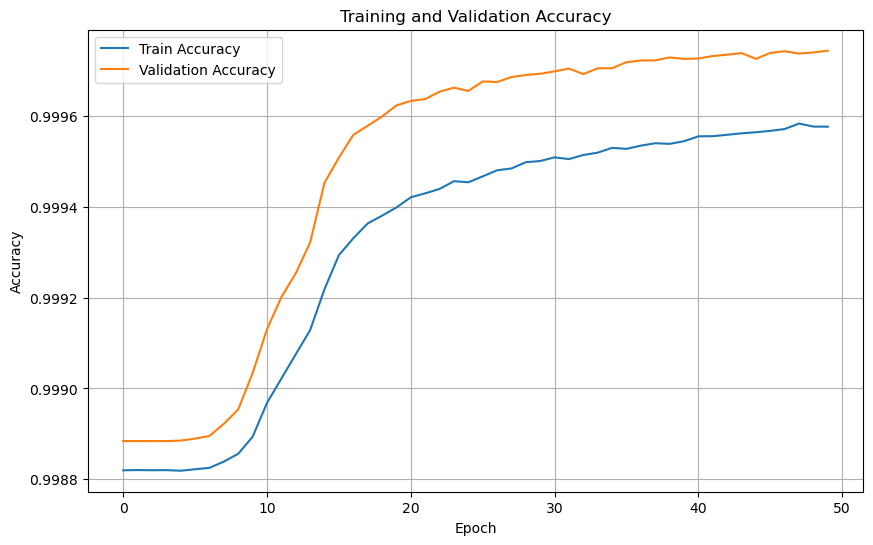

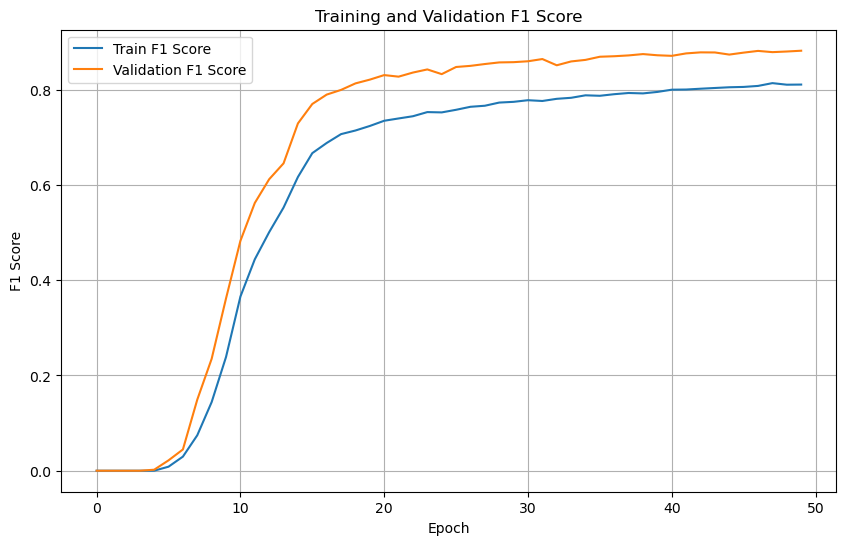

In [395]:
# Loss Plot
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Accuracy Plot
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# F1 Score Plot
plt.figure(figsize=(10, 6))
plt.plot(train_f1s, label='Train F1 Score')
plt.plot(val_f1s, label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1 Score')
plt.legend()
plt.grid()
plt.show()

In [396]:
def find_best_threshold(y_true, y_pred_probs):
    best_threshold = 0.5
    best_f1 = 0
    
    thresholds = np.linspace(0.1, 0.9, 50)  # Try many thresholds
    
    for t in thresholds:
        y_pred = (y_pred_probs > t).astype(np.uint8)
        precision = precision_score(y_true.flatten(), y_pred.flatten())
        recall = recall_score(y_true.flatten(), y_pred.flatten())
        if (precision + recall) == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
    
    return best_threshold, best_f1

In [ ]:
model.eval()
all_probs = []  
all_labels = []

with torch.no_grad():
    for images, masks in val_loader_bs_32:
        images = images.to(device)
        masks = masks.to(device)

        outputs = model(images)  
        all_probs.append(outputs.cpu().numpy().flatten())
        all_labels.append(masks.cpu().numpy().flatten())

# Concatenate all
all_probs = np.concatenate(all_probs)
all_labels = np.concatenate(all_labels)

# Apply default threshold 0.5 for initial evaluation
default_preds = (all_probs > 0.5).astype(np.float32)

precision = precision_score(all_labels, default_preds)
recall = recall_score(all_labels, default_preds)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Find the best threshold
best_threshold, best_f1 = find_best_threshold(all_labels, all_probs)
print(f"Best threshold: {best_threshold:.2f}, Best F1 Score: {best_f1:.4f}")

Precision: 0.9077
Recall: 0.8571
Best threshold: 0.44, Best F1 Score: 0.8833


In [399]:
def plot_precision_recall_f1(all_labels, all_probs):
    """
    Plots Precision, Recall, and F1 Score against different thresholds.
    Inputs:
        all_labels: true binary labels (numpy array)
        all_probs: predicted probabilities (numpy array)
    """

    precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)
    thresholds = np.append(thresholds, 1.0)  # To match the size of precisions/recalls

    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]

    # --- Plot ---
    plt.figure(figsize=(10,6))
    plt.plot(thresholds, precisions, label='Precision', color='blue')
    plt.plot(thresholds, recalls, label='Recall', color='green')
    plt.plot(thresholds, f1_scores, label='F1 Score', color='red')
    plt.scatter(best_threshold, best_f1, c='black', label=f'Best F1 ({best_f1:.2f}) at {best_threshold:.2f}', zorder=5)
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1 Score vs Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best threshold: {best_threshold:.2f}, Best F1 Score: {best_f1:.4f}")
    
    return best_threshold, best_f1

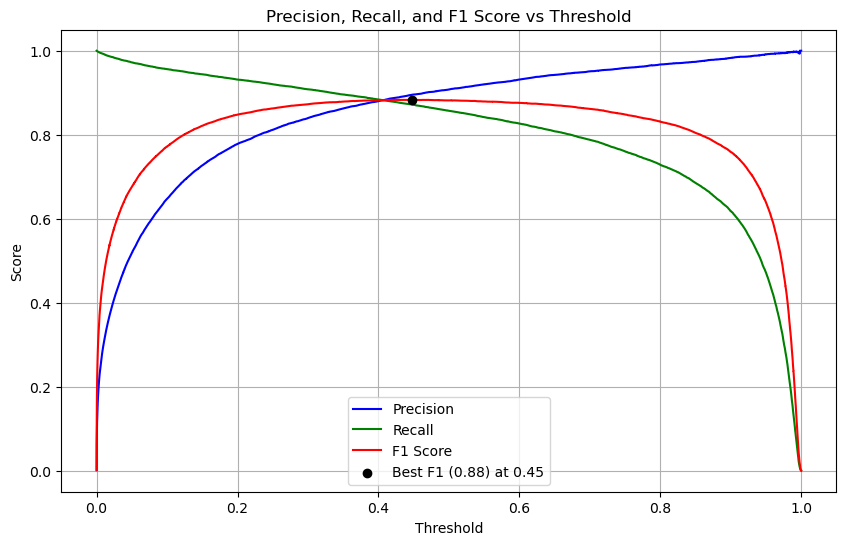

Best threshold: 0.45, Best F1 Score: 0.8835


In [400]:
best_threshold, best_f1 = plot_precision_recall_f1(all_labels, all_probs)


In [401]:
# Save model weights and best threshold
save_path = 'best_model.pth'

torch.save({
    'model_state_dict': model.state_dict(),
    'best_threshold': best_threshold,
    'optimizer_state_dict': optimizer.state_dict()
}, save_path)

print(f"Model and threshold saved to {save_path}")

Model and threshold saved to best_model.pth


In [406]:
checkpoint = torch.load(save_path)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
best_threshold = checkpoint['best_threshold']

model.eval()


/var/folders/p1/jsd5qxh15h774sg5vyn663yh0000gn/T/ipykernel_28736/3622083682.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(save_path)


DeeperWaferCNN(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel

In [410]:
all_preds = []

with torch.no_grad():
    for images in test_loader:
        images = images.to(device)
        outputs = model(images)  # output shape: [batch_size, 1, 128, 128]
        
        outputs = outputs.squeeze(1)  # shape: [batch_size, 128, 128]
        outputs = outputs.cpu().numpy()
        
        # Apply threshold (0.5): if prob > 0.5 -> scratch (1), else not (0)
        preds = (outputs > 0.44).astype(np.uint8)
        
        all_preds.extend(preds)  # collect all masks

In [ ]:
FIXED_IMAGE_SIZE = 128

# Copy test df
df_test = df_wafers_test.copy()

# Add new empty column
df_test['PredictedIsScratchDie'] = 0

# Group dies by wafer
grouped = df_test.groupby('WaferName')

# Iterate over each wafer
for i, (wafer_name, wafer_data) in enumerate(grouped):
    pred_mask = all_preds[i]  # predicted mask for this wafer
    
    # Find wafer min/max to reverse centering
    min_x, max_x = wafer_data['DieX'].min(), wafer_data['DieX'].max()
    min_y, max_y = wafer_data['DieY'].min(), wafer_data['DieY'].max()
    
    width = max_x - min_x + 1
    height = max_y - min_y + 1

    y_offset = (FIXED_IMAGE_SIZE - height) // 2
    x_offset = (FIXED_IMAGE_SIZE - width) // 2
    
    # Update for each die
    for idx, row in wafer_data.iterrows():
        x = row['DieX'] - min_x + x_offset
        y = row['DieY'] - min_y + y_offset
        
        if 0 <= x < FIXED_IMAGE_SIZE and 0 <= y < FIXED_IMAGE_SIZE:
            df_test.at[idx, 'PredictedIsScratchDie'] = int(pred_mask[y, x])


In [412]:
df_wafers_test['IsScratchDie'] = df_test['PredictedIsScratchDie'].map({0: False, 1: True})


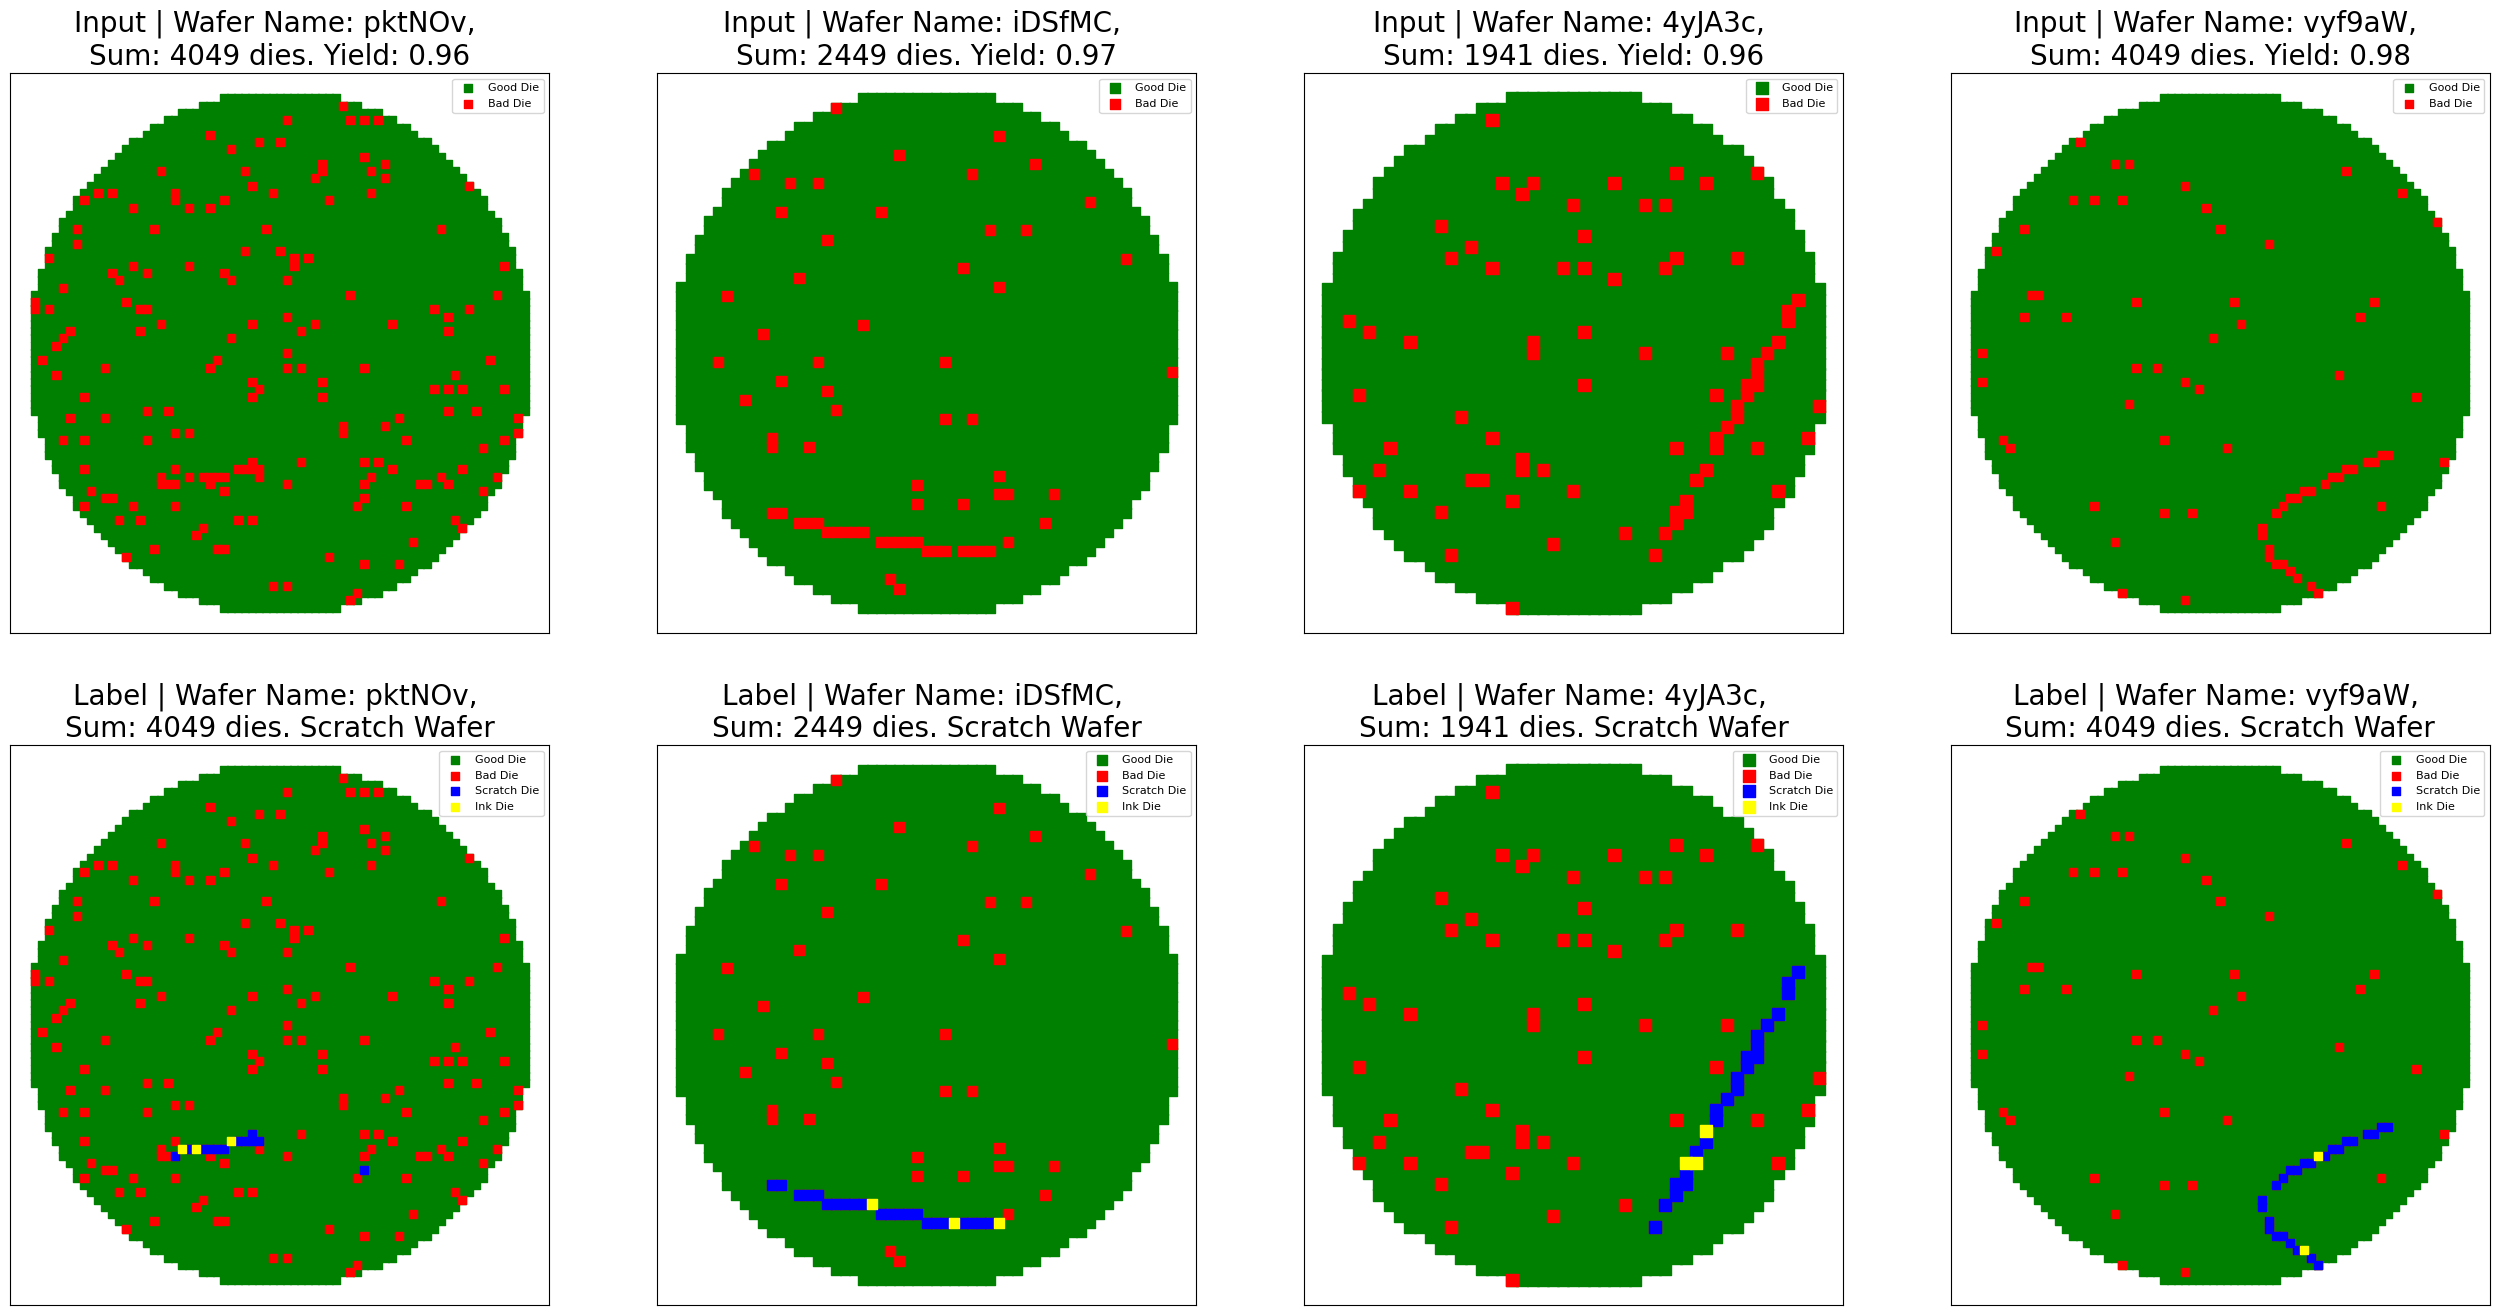

In [413]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = True)

# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [ ]:
#TODO add your thoughts

# I added my thought which are related to the solution along the previous section.
# Another intresting area to explore is taking an actual images of wafers and to predict the failure types using the NN.

# I will also raise these Qs:
#   a. Do we want to analyze the model and the results with respect to wafer batches? this way we can check systematic faults
#   b. How can we predict dies validity without running in all testing stations? 
#   c. Which station is the most important to check?

# It is important also to implement a pipeline of online learning methods, and to keep the model updated after each wafer? or batch?


# Deployment thoughts: 
# The model after deployment should be monitored, we need to regularly assess the model’s performance and accuracy.
# We need also to think of retraining strategy, when to use new data?
# We need to collect feedback from operational teams.
# I think we also should do a yield classification for each wafer before running this prediction, as mentioned earlier.

# Submission

In [414]:
#TODO

#model = (...)
#IsScratchDie = model.predict(df_wafers_test)
#df_wafers_test['IsScratchDie'] = IsScratchDie

#TODO Fill in your name and email
name = 'Nagham Daood'
email = 'naghamdaood@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)

Saved file: 20250505_Nagham Daood_naghamdaood@gmail.com_df_wafers_test_with_preds.csv
